In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_quadrilateral(basis, color='k'):
    """Plot the quadrilateral defined by the two basis vectors."""
    ix, iy = basis[0]
    jx, jy = basis[1]
    plt.plot([0, ix, ix+jx, jx, 0], [0, iy, iy+jy, jy, 0], color)

def plot_vector(v, color='k', lw=1):
    """Plot vector v as a line with a specified color and linewidth."""
    plt.plot([0, v[0]], [0, v[1]], c=color, lw=lw)

def plot_points(grid, color='k'):
    """Plot the grid points in a specified color."""
    plt.scatter(*grid, c=color, s=2, alpha=0.5)

def apply_transformation(basis, T):
    """Return the transformed basis after applying transformation T."""
    return (T @ basis.T).T

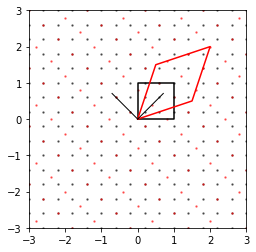

In [6]:

# Set up a Cartesian grid of points.
XMIN, XMAX, YMIN, YMAX = -3, 3, -3, 3
N = 16
xgrid = np.linspace(XMIN, XMAX, N)
ygrid = np.linspace(YMIN, YMAX, N)
grid = np.array(np.meshgrid(xgrid, ygrid)).reshape(2, N**2)

# Our untransformed unit basis vectors, i and j:
basis = np.array([[1,0], [0,1]])
# The untransformed grid and unit square.
plot_points(grid)
plot_quadrilateral(basis)

# Apply the transformation matrix, S, to the scene.
S = np.array(((1.5, 0.5),(0.5, 1.5)))
tbasis = apply_transformation(basis, S)
plot_quadrilateral(tbasis, 'r')
tgrid = S @ grid
plot_points(tgrid, 'r')

# Find the eigenvalues and eigenvectors of S... 
vals, vecs = np.linalg.eig(S)
#print(vals, vecs)
if all(np.isreal(vals)):
    # ... if they're all real, indicate them on the diagram.
    v1, v2 = vals
    e1, e2 = vecs.T
    #plot_vector(v1*e1, 'r', 3)
    #plot_vector(v2*e2, 'r', 3)
    plot_vector(e1, 'k')
    plot_vector(e2, 'k')

# Ensure the plot has 1:1 aspect (i.e. squares look square) and set the limits.
plt.axis('square')
plt.xlim(XMIN, XMAX)
plt.ylim(YMIN, YMAX)

plt.show()